# How to use SVSA to learn and predict lineshapes

First we import the package as well as numpy

In [1]:
import svsa
import numpy as np

In order to train the SVSA model we need to have some training data. We'll use the built-in Tenti S6 model to generate RB scattering lineshapes.

In [2]:
train_lineshapes, train_params, xs = svsa.gen_spectra(y_seq=np.linspace(0,2,num=5),
                                                            ri_seq=np.linspace(1.5,3,num=2),
                                                            ef_seq=np.linspace(1.8,2,num=5),
                                                            ci_seq=np.array([1]),
                                                            ct_seq=np.array([1.5]),
                                                            x_seq=np.linspace(-3,3,num=100))

this generates an array of training lineshapes for the given (50) parameters over the (100) values of x

In [3]:
print(train_params.shape)
train_params[0:5] # first five training parameters

(50, 5)


,y,rlx_int,eukenf,c_int,c_tr
0,0.0,1.5,1.80,1.0,1.5
1,0.0,1.5,1.85,1.0,1.5
2,0.0,1.5,1.90,1.0,1.5
3,0.0,1.5,1.95,1.0,1.5
4,0.0,1.5,2.00,1.0,1.5


In [4]:
print(xs.shape)
xs[0:5] # first five x values used to train

(100,)


array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576])

In [5]:
print(train_lineshapes.shape)
train_lineshapes[0:5] # first five lineshapes 

(50, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000437,0.000627,0.000892,0.00126,0.001767,0.002459,0.003397,0.004659,0.006343,0.008572,...,0.008572,0.006343,0.004659,0.003397,0.002459,0.001767,0.00126,0.000892,0.000627,0.000437
1,0.000437,0.000627,0.000892,0.00126,0.001767,0.002459,0.003397,0.004659,0.006343,0.008572,...,0.008572,0.006343,0.004659,0.003397,0.002459,0.001767,0.00126,0.000892,0.000627,0.000437
2,0.000437,0.000627,0.000892,0.00126,0.001767,0.002459,0.003397,0.004659,0.006343,0.008572,...,0.008572,0.006343,0.004659,0.003397,0.002459,0.001767,0.00126,0.000892,0.000627,0.000437
3,0.000437,0.000627,0.000892,0.00126,0.001767,0.002459,0.003397,0.004659,0.006343,0.008572,...,0.008572,0.006343,0.004659,0.003397,0.002459,0.001767,0.00126,0.000892,0.000627,0.000437
4,0.000437,0.000627,0.000892,0.00126,0.001767,0.002459,0.003397,0.004659,0.006343,0.008572,...,0.008572,0.006343,0.004659,0.003397,0.002459,0.001767,0.00126,0.000892,0.000627,0.000437


We can then train SVSA by passing these into the method and calling the fit function (with appropriate choices of nu and K)

In [6]:
svs = svsa.SupportVectorSpectrum(train_params=train_params,train_lineshapes=train_lineshapes,train_x=xs)
svs.fit(nu=1E-1,K=3)

We can then predict a new line using the predict function passing in the values for the parameters at which we would like to predict the line

In [7]:
test_params = np.array([[.8,2,1.9,1,1.5]]).T
pred = svs.predict(test_params)

we can then plot and compare it to Tenti's S6 model

In [8]:
import pandas as pd
from scipy.special import wofz

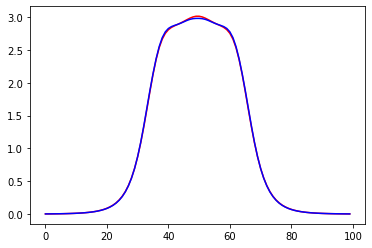

In [9]:
import matplotlib.pyplot as plt
tenti_line = svsa.crbs6(y=test_params[0,0],
                           rlx_int=test_params[1],
                           eukenf=test_params[2],
                           c_int=test_params[3],
                           c_tr=test_params[4],
                           xi=np.linspace(-3,3,num=100))['sptsig']
plt.plot(tenti_line,color='red')
plt.plot(pred,color='blue')
plt.show()

we can also save the output from the fit coefficients as either a .mat file for MATLAB or as a collection of .csv files for other uses (like R)

In [10]:
svs.save_fit(fname="test_fit",type="mat") # for use in matlab
svs.save_fit("test_fit",type='csv') # for use in other languages, e.g. R